In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install sklearn
#import statsmodel.formula.api as smf


In [3]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

In [4]:
data_Back = pd.read_csv("Data_of_Attack_Back.csv")
data_Back["Attack"] = "Back"
data_BufferOverFlow = pd.read_csv("Data_of_Attack_Back_BufferOverflow.csv")
data_BufferOverFlow["Attack"] = "BufferOverFlow"
data_GuessPassword = pd.read_csv("Data_of_Attack_Back_GuessPassword.csv")
data_GuessPassword["Attack"] = "GuessPassword"
data_Neptune = pd.read_csv("Data_of_Attack_Back_Neptune.csv")
data_Neptune["Attack"] = "Neptune"
data_NMap = pd.read_csv("Data_of_Attack_Back_NMap.csv")
data_NMap["Attack"] = "NMap"
data_Normal = pd.read_csv("Data_of_Attack_Back_Normal.csv")
data_Normal["Attack"] = "Normal"
data_PortSweep = pd.read_csv("Data_of_Attack_Back_PortSweep.csv")
data_PortSweep["Attack"] = "PortSweep"
data_RootKit = pd.read_csv("Data_of_Attack_Back_RootKit.csv")
data_RootKit["Attack"] = "RootKit"
data_Satan = pd.read_csv("Data_of_Attack_Back_Satan.csv")
data_Satan["Attack"] = "Satan"
data_Smurf = pd.read_csv("Data_of_Attack_Back_Smurf.csv")
data_Smurf["Attack"] = "Smurf"

In [5]:
data_FTPWrite = pd.read_csv("Data_of_Attack_Back_FTPWrite.csv", header = None)
data_FTPWrite["Attack"] = "FTPWrite"
data_FTPWrite.columns = data_BufferOverFlow.columns

In [6]:
data =pd.concat([data_Back, data_BufferOverFlow,data_FTPWrite, data_GuessPassword,data_Neptune, data_NMap, data_Normal, data_PortSweep, data_RootKit, data_Satan, data_Smurf])
data

#data.to_csv("data.csv")

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.001,0.100,0.000,0.100,0.0,0.0,0.0,0.0,0.0,Back
1,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.002,0.100,0.000,0.050,0.0,0.0,0.0,0.0,0.0,Back
2,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.003,0.100,0.000,0.033,0.0,0.0,0.0,0.0,0.0,Back
3,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.004,0.100,0.000,0.025,0.0,0.0,0.0,0.0,0.0,Back
4,0.0,0.00,0.00,0.0,0.54540,0.08314,0,0.0,0.0,0.2,...,0.005,0.100,0.000,0.020,0.0,0.0,0.0,0.0,0.0,Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.251,0.098,0.001,0.098,0.0,0.0,0.0,0.0,0.0,Smurf
3003,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.252,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,Smurf
3004,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.253,0.099,0.001,0.099,0.0,0.0,0.0,0.0,0.0,Smurf
3005,0.0,0.02,0.09,0.0,0.01032,0.00000,0,0.0,0.0,0.0,...,0.254,0.100,0.001,0.100,0.0,0.0,0.0,0.0,0.0,Smurf


In [7]:
data.Attack.value_counts()

Normal            576710
Neptune           227228
Satan               5019
Smurf               3007
PortSweep           2964
NMap                1554
Back                 968
GuessPassword         53
BufferOverFlow        30
RootKit               10
FTPWrite               8
Name: Attack, dtype: int64

In [8]:
#Removing unwanted spaces from the column name

data.columns = data.columns.str.replace(" ", "")

In [9]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Attack'],
      dtype='object')

In [10]:
# There are no null values

data.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [11]:
# There are no duplicates

data.duplicated().sum()

0

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817551 entries, 0 to 3006
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817551 non-null  float64
 1   protocol_type                817551 non-null  float64
 2   service                      817551 non-null  float64
 3   flag                         817551 non-null  float64
 4   src_bytes                    817551 non-null  float64
 5   dst_bytes                    817551 non-null  float64
 6   land                         817551 non-null  int64  
 7   wrong_fragment               817551 non-null  float64
 8   urgent                       817551 non-null  float64
 9   hot                          817551 non-null  float64
 10  num_failed_logins            817551 non-null  float64
 11  logged_in                    817551 non-null  float64
 12  num_compromised              817551 non-null  float64
 13  r

In [13]:
data.flag.value_counts()

0.00    570819
0.07    202685
0.05     38579
0.06      2541
0.08      2020
0.02       331
0.10       298
0.09       122
0.01        97
0.04        40
0.03        19
Name: flag, dtype: int64

In [14]:
# Outlier Treatment

def outlier_val(x):
    if ((x.dtype == 'float') or (x.dtype == 'int')):
        x = x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99))
    else:
        x
    
    return x

In [15]:
data = data.apply(outlier_val)

In [16]:
# Performing pandas profiling

import pandas_profiling as pf

In [17]:
data.describe(include = "all")

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
count,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.0,817551.0,817551.0,817551.0,...,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,576710
mean,0.000026,0.000501,0.052489,0.020121,0.003335,0.022910,0.0,0.0,0.0,0.0,...,0.161651,0.066795,0.003018,0.006148,0.001582,0.024865,0.024852,0.005372,0.005279,NaN
std,0.000172,0.002182,0.094158,0.030887,0.008239,0.049703,0.0,0.0,0.0,0.0,...,0.111642,0.043421,0.005348,0.017460,0.002782,0.043062,0.043151,0.021920,0.022070,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.017000,0.007000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.002170,0.003670,0.0,0.0,0.0,0.0,...,0.255000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.120000,0.070000,0.002990,0.019690,0.0,0.0,0.0,0.0,...,0.255000,0.100000,0.006000,0.003000,0.002000,0.014000,0.003000,0.000000,0.000000,NaN


In [18]:
data.Attack.value_counts()

Normal            576710
Neptune           227228
Satan               5019
Smurf               3007
PortSweep           2964
NMap                1554
Back                 968
GuessPassword         53
BufferOverFlow        30
RootKit               10
FTPWrite               8
Name: Attack, dtype: int64

In [19]:
data_mul = data

In [20]:
data_mul["Attack_mul"] = np.where(data_mul.Attack == "Normal", 1, np.where(data_mul.Attack == "Neptune",2, np.where(data_mul.Attack == "Satan", 3, np.where(data_mul.Attack == "Smurf", 4, np.where(data_mul.Attack == "PortSweep", 5, np.where(data_mul.Attack == "NMap", 6, np.where(data_mul.Attack == "Back", 7, np.where(data_mul.Attack == "GuessPassword", 8, np.where(data_mul.Attack == "BufferOverFlow", 9, np.where(data_mul.Attack == "RootKit", 10, 11))))))))))

In [21]:
data_mul["Attack_bin"] = np.where(data_mul.Attack == "Normal",1,2)

In [22]:
data_bin = data[data.columns.difference(["Attack", "Attack_mul"])]
data_bin.Attack_bin.value_counts()

1    576710
2    240841
Name: Attack_bin, dtype: int64

In [23]:
Y_bin = data_bin.Attack_bin
X_bin = data_bin[data_bin.columns.difference(["Attack_bin"])]

In [24]:
data_mul = data[data.columns.difference(["Attack", "Attack_bin"])]
data_mul.Attack_mul.value_counts()

1     576710
2     227228
3       5019
4       3007
5       2964
6       1554
7        968
8         53
9         30
10        10
11         8
Name: Attack_mul, dtype: int64

In [25]:
Y_mul = data_mul.Attack_mul
X_mul = data_mul[data_mul.columns.difference(["Attack_mul"])]

# BINOMIAL CLASSIFICATION

### The data is imbalanced. Convert data to balanced by using SMOTE technique

In [26]:
!pip install imblearn

In [27]:
import imblearn.over_sampling
from imblearn.over_sampling import SMOTE

In [28]:
sm = SMOTE(random_state = 42)

In [29]:
X_bin_res, Y_bin_res = sm.fit_resample(X_bin.values, Y_bin.values)

In [30]:
X_bin_res

array([[0.001     , 0.        , 0.08314   , ..., 0.        , 0.        ,
        0.        ],
       [0.002     , 0.        , 0.08314   , ..., 0.        , 0.        ,
        0.        ],
       [0.003     , 0.        , 0.08314   , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.2285818 , 0.007     , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.26025589, 0.00541863, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01287467, 0.02325067, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [31]:
Y_bin_res

array([2, 2, 2, ..., 2, 2, 2])

In [32]:
data_bin_bal = pd.concat([pd.Series(Y_bin_res), pd.DataFrame(X_bin_res),], axis = 1)
data_bin_bal.columns = data_bin.columns

In [33]:
data_bin_bal.Attack_bin.value_counts()

1    576710
2    576710
Name: Attack_bin, dtype: int64

# MULTINOMIAL CLASSIFICATION

In [34]:
sm_mul = SMOTE(random_state = 42)

In [35]:
X_mul_res, Y_mul_res = sm.fit_resample(X_mul.values, Y_mul.values)

In [36]:
data_mul_bal = pd.concat([pd.Series(Y_mul_res), pd.DataFrame(X_mul_res),], axis = 1)

In [37]:
data_mul_bal.columns = data_mul.columns

In [38]:
data_mul_bal.Attack_mul.value_counts()

1     576710
2     576710
3     576710
4     576710
5     576710
6     576710
7     576710
8     576710
9     576710
10    576710
11    576710
Name: Attack_mul, dtype: int64

# DATA PREPERATION(STEP-2)

In [39]:
import seaborn as sns

C:\Users\saach\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Attack_bin', ylabel='Density'>

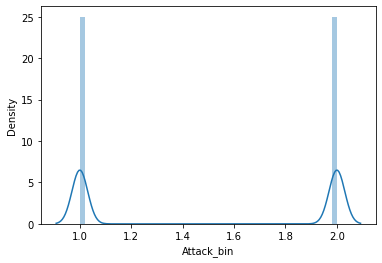

In [40]:
sns.distplot(data_bin_bal.Attack_bin)

C:\Users\saach\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Attack_mul', ylabel='Density'>

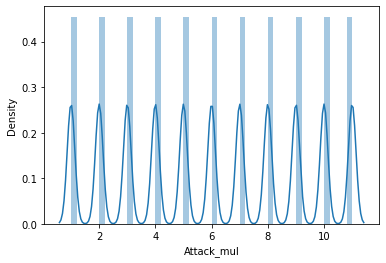

In [41]:
sns.distplot(data_mul_bal.Attack_mul)

# DATA PREPERATION(STEP-3)

### FEATURE ENGINEERING

In [42]:
data_bin.dtypes

Attack_bin                       int32
count                          float64
diff_srv_rate                  float64
dst_bytes                      float64
dst_host_count                 float64
dst_host_diff_srv_rate         float64
dst_host_rerror_rate           float64
dst_host_same_src_port_rate    float64
dst_host_same_srv_rate         float64
dst_host_serror_rate           float64
dst_host_srv_count             float64
dst_host_srv_diff_host_rate    float64
dst_host_srv_rerror_rate       float64
dst_host_srv_serror_rate       float64
duration                       float64
flag                           float64
hot                            float64
is_guest_login                 float64
is_host_login                  float64
land                             int64
logged_in                      float64
num_access_files               float64
num_compromised                float64
num_failed_logins              float64
num_file_creations             float64
num_outbound_cmds        

In [43]:
corr_y = data_bin.corrwith(data_bin.Attack_bin)

corr_y.to_csv('corr_y_bin.csv')

#### 3.feature selection based on importance

In [44]:
!pip install sklearn

In [45]:
from sklearn.feature_selection import f_regression, RFE, SelectKBest

In [46]:
target = data_bin.Attack_bin

features = data_bin[data_bin.columns.difference(["Attack_bin"])]

In [47]:
F_value, P_value = f_regression(features, target)

C:\Users\saach\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [48]:
f_reg_results = pd.concat([pd.Series(features.columns), pd.Series(F_value), pd.Series(P_value)], axis = 1)
f_reg_results.columns = ["Features", "F_value", "P_value"]

In [49]:
f_reg_results

,Features,F_value,P_value
0,count,2.191356e+06,0.000000e+00
1,diff_srv_rate,2.468545e+05,0.000000e+00
2,dst_bytes,7.701828e+04,0.000000e+00
3,dst_host_count,3.312568e+05,0.000000e+00
4,dst_host_diff_srv_rate,3.777321e+05,0.000000e+00
5,dst_host_rerror_rate,4.095603e+04,0.000000e+00
6,dst_host_same_src_port_rate,1.262660e+04,0.000000e+00
7,dst_host_same_srv_rate,3.607967e+06,0.000000e+00
8,dst_host_serror_rate,3.024953e+06,0.000000e+00
9,dst_host_srv_count,2.205698e+06,0.000000e+00


In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
Y = data_bin.Attack_bin
X = data_bin[data_bin.columns.difference(["Attack_bin"])]

In [52]:
RFE_model = RFE(estimator = RandomForestClassifier(), n_features_to_select= 10, verbose=True).fit(X,Y)

Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 fe

In [53]:
X.columns

Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_rerror_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'dst_host_srv_rerror_rate',
       'dst_host_srv_serror_rate', 'duration', 'flag', 'hot', 'is_guest_login',
       'is_host_login', 'land', 'logged_in', 'num_access_files',
       'num_compromised', 'num_failed_logins', 'num_file_creations',
       'num_outbound_cmds', 'num_root', 'num_shells', 'protocol_type',
       'rerror_rate', 'root_shell', 'same_srv_rate', 'serror_rate', 'service',
       'src_bytes', 'srv_count', 'srv_diff_host_rate', 'srv_error_rate',
       'srv_rerror_rate', 'su_attempted', 'urgent', 'wrong_fragment'],
      dtype='object')

In [54]:
X_new = X[X.columns[RFE_model.get_support()]]

In [55]:
# Top 10 models identified using RFE technique

pd.Series(X_new.columns)

0                     count
1             diff_srv_rate
2                 dst_bytes
3            dst_host_count
4    dst_host_same_srv_rate
5        dst_host_srv_count
6                      flag
7             same_srv_rate
8                   service
9                 src_bytes
dtype: object

In [56]:
rfe_ranking = pd.concat([pd.Series(features.columns), pd.Series(RFE_model.ranking_)], axis =1)
rfe_ranking.columns = ["Feature", "Rank"]

In [57]:
rfe_ranking.sort_values(by = "Rank")

,Feature,Rank
0,count,1
1,diff_srv_rate,1
2,dst_bytes,1
3,dst_host_count,1
32,service,1
7,dst_host_same_srv_rate,1
9,dst_host_srv_count,1
30,same_srv_rate,1
33,src_bytes,1
14,flag,1


In [58]:
final_list = [
              'flag',
              'dst_host_srv_serror_rate',
              'srv_error_rate',
              'dst_host_serror_rate',
              'serror_rate',
              'count',
              'service',
              'dst_host_diff_srv_rate',
              'dst_host_count',
              'diff_srv_rate',
              'rerror_rate',
              'dst_host_srv_rerror_rate',
              'src_bytes',
              'srv_diff_host_rate',
              'dst_bytes',
              'dst_host_srv_diff_host_rate',
              'logged_in',
              'dst_host_srv_count',
              'dst_host_same_srv_rate',
              'same_srv_rate',
             ]

In [59]:
features[final_list]

,flag,dst_host_srv_serror_rate,srv_error_rate,dst_host_serror_rate,serror_rate,count,service,dst_host_diff_srv_rate,dst_host_count,diff_srv_rate,rerror_rate,dst_host_srv_rerror_rate,src_bytes,srv_diff_host_rate,dst_bytes,dst_host_srv_diff_host_rate,logged_in,dst_host_srv_count,dst_host_same_srv_rate,same_srv_rate
0,0.0,0.0,0.0,0.0,0.0,0.001,0.00,0.000,0.001,0.0,0.0,0.0,0.07012,0.100,0.08314,0.0,0.1,0.001,0.100,0.1
1,0.0,0.0,0.0,0.0,0.0,0.002,0.00,0.000,0.002,0.0,0.0,0.0,0.07012,0.067,0.08314,0.0,0.1,0.002,0.100,0.1
2,0.0,0.0,0.0,0.0,0.0,0.003,0.00,0.000,0.003,0.0,0.0,0.0,0.07012,0.050,0.08314,0.0,0.1,0.003,0.100,0.1
3,0.0,0.0,0.0,0.0,0.0,0.004,0.00,0.000,0.004,0.0,0.0,0.0,0.07012,0.000,0.08314,0.0,0.1,0.004,0.100,0.1
4,0.0,0.0,0.0,0.0,0.0,0.004,0.00,0.000,0.005,0.0,0.0,0.0,0.07012,0.000,0.08314,0.0,0.1,0.005,0.100,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,0.0,0.0,0.0,0.0,0.0,0.251,0.09,0.001,0.255,0.0,0.0,0.0,0.01032,0.000,0.00000,0.0,0.0,0.251,0.098,0.1
3003,0.0,0.0,0.0,0.0,0.0,0.252,0.09,0.001,0.255,0.0,0.0,0.0,0.01032,0.000,0.00000,0.0,0.0,0.252,0.099,0.1
3004,0.0,0.0,0.0,0.0,0.0,0.253,0.09,0.001,0.255,0.0,0.0,0.0,0.01032,0.000,0.00000,0.0,0.0,0.253,0.099,0.1
3005,0.0,0.0,0.0,0.0,0.0,0.254,0.09,0.001,0.255,0.0,0.0,0.0,0.01032,0.000,0.00000,0.0,0.0,0.254,0.100,0.1


In [60]:
#Multicollinearity check using VIF approach

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
VIF = pd.Series([variance_inflation_factor(features[list].values, i) for i in range(len(final_list))])

C:\Users\saach\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [62]:
VIF_value = pd.concat([pd.Series(final_list),VIF], axis =1)
VIF_value.columns = ["feature,", "vif"]

In [63]:
VIF_value.sort_values(by = "vif", ascending = False)

,"feature,",vif
12,src_bytes,713.050538
14,dst_bytes,428.024958
8,dst_host_count,390.893393
7,dst_host_diff_srv_rate,67.071874
19,same_srv_rate,43.741294
9,diff_srv_rate,36.887370
11,dst_host_srv_rerror_rate,36.209541
5,count,23.967956
3,dst_host_serror_rate,9.269243
0,flag,7.054859


### Since all the VIF values are HIGH. There is multicollinearity

# Splitting the model in train and test for Binomial Classification

In [64]:
Y_res = data_bin.Attack_bin
X_res = features[final_list]

In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV

train_X, test_X, train_Y, test_Y=train_test_split(X_res, Y_res, test_size=0.3, random_state =123)

# Splitting the model in train and test for Multinomial Classification

In [66]:
Y_res_mul = data_mul.Attack_mul
X_res = features[final_list]

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

train_X_mul, test_X_mul, train_Y_mul, test_Y_mul =train_test_split(X_res, Y_res_mul, test_size=0.3, random_state =123)

# Model Building

# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
model = LogisticRegression()

In [69]:
model = model.fit(train_X, train_Y)

In [70]:
model.intercept_

array([-2.54408314])

In [71]:
model.coef_

array([[ 16.62689988,  10.66037741,   9.98218466,   8.70055613,
          9.44498738,  16.40771205,   9.17371474,  14.23338505,
          8.05720459,  -0.2201503 ,   5.95303966,   5.43009984,
         15.82048152,  10.4878327 ,   6.37820579,   3.97385638,
        -18.84242627, -14.78824993,  12.83887991, -21.46189525]])

In [72]:
pred_train_Y = model.predict(train_X)
pred_test_Y = model.predict(test_X)

In [73]:
from sklearn import metrics

In [74]:
print(metrics.classification_report(train_Y, pred_train_Y))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00    403432
           2       1.00      0.98      0.99    168853

    accuracy                           0.99    572285
   macro avg       0.99      0.99      0.99    572285
weighted avg       0.99      0.99      0.99    572285



In [75]:
print(metrics.classification_report(test_Y, pred_test_Y))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00    173278
           2       1.00      0.98      0.99     71988

    accuracy                           0.99    245266
   macro avg       0.99      0.99      0.99    245266
weighted avg       0.99      0.99      0.99    245266



In [76]:
train_prob_Y = model.predict_proba(train_X)
test_prob_Y = model.predict_proba(test_X)

In [77]:
train_prob = pd.DataFrame(train_prob_Y)[1]
test_prob = pd.DataFrame(test_prob_Y)[1]

In [78]:
metrics.roc_auc_score(train_Y, train_prob)

0.9991578021723841

In [79]:
metrics.roc_auc_score(test_Y, test_prob)

0.9991495673510501

# Naive Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [81]:
model = BernoulliNB()

In [82]:
model = model.fit(train_X, train_Y)

In [83]:
pred_train_Y = model.predict(train_X)
pred_test_Y = model.predict(test_X)

In [84]:
from sklearn import metrics

In [85]:
print(metrics.classification_report(train_Y, pred_train_Y))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99    403432
           2       1.00      0.97      0.98    168853

    accuracy                           0.99    572285
   macro avg       0.99      0.99      0.99    572285
weighted avg       0.99      0.99      0.99    572285



In [86]:
print(metrics.classification_report(test_Y, pred_test_Y))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99    173278
           2       1.00      0.97      0.98     71988

    accuracy                           0.99    245266
   macro avg       0.99      0.99      0.99    245266
weighted avg       0.99      0.99      0.99    245266



In [87]:
train_prob_Y = model.predict_proba(train_X)
test_prob_Y = model.predict_proba(test_X)

In [88]:
train_prob = pd.DataFrame(train_prob_Y)[1]
test_prob = pd.DataFrame(test_prob_Y)[1]

In [89]:
metrics.roc_auc_score(train_Y, train_prob)

0.997899219581483

In [90]:
metrics.roc_auc_score(test_Y, test_prob)

0.9979475070950224

# KNN

## Standardise the data

In [91]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [92]:
sc = StandardScaler()

In [93]:
sc = sc.fit(train_X)

In [94]:
train_X_std = pd.DataFrame(sc.transform(train_X), columns = train_X.columns)

test_X_std = pd.DataFrame(sc.transform(test_X), columns = test_X.columns)

### 1. When you don't know the tuning parameter

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [96]:
grid = {"n_neighbors": [4,5,6,7,8], "weights": ["uniform", "distance"]}

In [97]:
model = GridSearchCV(KNeighborsClassifier(), grid, n_jobs = -1, verbose = True, cv = 10, scoring = "accuracy")

In [ ]:
model = model.fit(train_X_std, train_Y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
model.set_params

In [ ]:
model.best_sc

### 2. When you know the tuning parameter

In [ ]:
model = KNeighborsClassifier(n_neighbors = , weights = , n_jobs = -1)

In [ ]:
model = model.fit(train_X_std, train_Y)

In [ ]:
pred_train_Y = model.predict(train_X_std)
pred_test_Y = model.predict(test_X_std)

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(train_Y, pred_train_Y))

In [ ]:
print(metrics.classification_report(test_Y, pred_test_Y))

In [ ]:
train_prob_Y = model.predict_proba(train_X_std)
test_prob_Y = model.predict_proba(test_X_std)

In [ ]:
train_prob = pd.DataFrame(train_prob_Y)[1]
test_prob = pd.DataFrame(test_prob_Y)[1]

In [ ]:
metrics.roc_auc_score(train_Y, train_prob)

In [ ]:
metrics.roc_auc_score(test_Y, test_prob)